# EECS 469/569: Homework 2 Submission
## Single Node Multi-Threaded Performance of Roaring Thunder
### Due: Tuesday, Oct. 4 *before* midnight

[Sign-up for a grading period here.](https://doodle.com/meeting/participate/id/epQo0Dra)

## Name 1:
## Name 2: 

## Checklist

0. [Other Deliverables](#Other-Deliverables)
    0. Sign up for grading slot
    1. Email team to Dr. Hansen
    2. Write a couple of paragraphs on main takeaways and how you worked together
1. [OpenMP Overhead](#2.-OpenMP-Overhead)
    1. paper summary
    2. directive overhead
    3. scheduler overhead
2. [OpenMP Linear Algebra](#3.-OpenMP-Linear-Algebra)
    1. naive versus tiled parallel speedup
    2. parallel for versus tasks speedup
    3. matrix-vector and dot-product speedup
3. [Non-Linear Algebra](#4.-Non-Linear-Algebra)
    1. description of your solved problem and how you solved it, discussion of another group

### Submission Instructions

Follow all instructions within `hw02.ipynb`. To submit the homework assignment, put **only relevant files (including this notebook)** in a folder. Zip the folder (e.g., using [7-zip](https://www.7-zip.org/)) and send one email to Dr. Hansen (CC your partner) with the zipped folder. **Do not include the benchmark files, they are not relevant.** Print a .pdf of this (completed) Jupyter notebook and submit it to D2L before the deadline (`CTRL+P` $\rightarrow$ `Save as PDF` in Google Chrome). 

It is your responsibility that all of the figures, plots, source code, etc. properly appear in the submitted notebook **and .pdf**. Homework 1 was graded leniently, this homework will check to see improvements.  

## Other Deliverables

$\mathbf{\infty}$**.1** **FIRST DELIVERABLE (-5 points if not done):** ***By class on Monday, Sep. 19,*** email Dr. Hansen (CC your partner) who you will be working with for this homework. 

$\mathbf{\infty}$**.2** **FINAL DELIVERABLE (3 points):** ***After*** you have completed the entire assignment, write a few paragraphs on your main takeaways from the assignment. **Clearly state** how the work was split up between you and your partner. 

## 2. OpenMP Overhead

### Required SLURM Batch Submissions:
* submit the provided `.slurm` file in the syncbench folder

**Datasets:** link your code and datasets here with a couple word description of each:
* [example link](matrix_multiply_serial_naive.c)
* 

**2.1 DELIVERABLE (3 points):** Write a one paragraph summary of the paper. 

**2.2 DELIVERABLE (10 points):** For syncbench: create a table with the average overhead time, and discuss the overhead of the following OpenMP directives: parallel, for, parallel for, barrier, critical, atomic. 

Create a box-whiskers that compares the time distribution between critical, lock/unlock, and atomic. Discuss.

| parallel | for | parallel for | barrier | critical | atomic |
|----------|-----|--------------|---------|----------|--------|
|3.608037  |0.002238| 0.045789    |0.005272 | 0.004154 |0.000193|

**discussion:**
The plain parallel has the most overhead due do its lack of optimization like for or parallel for. And the reason why parallel for has more overhead than just for is because parallel for needs to go through the parallel initialization. The atomic has the least overhead because its only accessing to one memory address. For critical, it has more overhead because its making private copies for each thread. On paper, barrier has the least overhead, because its simply putting a breakpoint on each thread. 

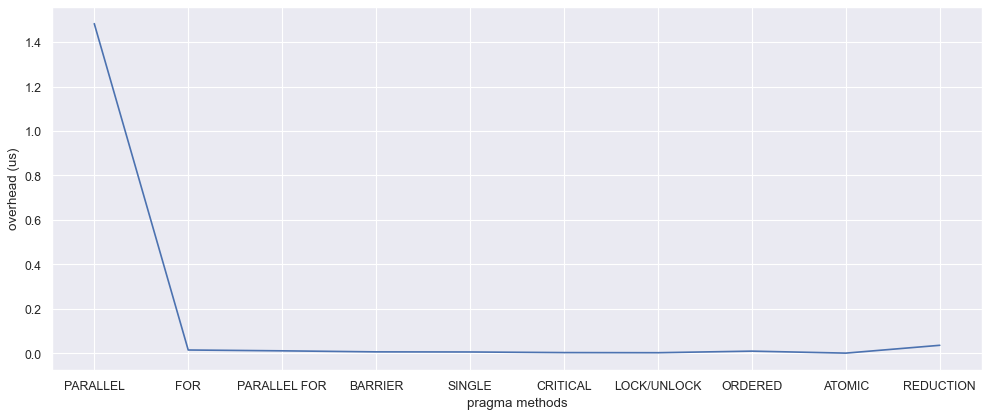

In [46]:
# plot the box-whiskers plot here
from sys import api_version
from unicodedata import name
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.pyplot import figure

figure(figsize=(15, 6), dpi=80)
sns.set()

#get random number generator from numpy
rng = np.random.default_rng()
syndf = pd.read_csv("syncbench.csv")
syndf = syndf.set_index('name')

names = [index for index in syndf.index]
overhead_avgs = list(syndf[' overhead avg (us)'].values)

plt.ylabel('overhead (us)')
plt.xlabel("pragma methods")
plt.plot(names, overhead_avgs)


**discussion:**

**2.3 DELIVERABLE (10 points):** For schedbench: load the CSV file output using Python below. Recreate Fig. 7 from the paper, except use the overhead time in microseconds (us) instead of clock cycles. You may need to use a log-scale for the y-axis. 

For the dynamic scheduler overhead, create a single figure that has a normal distribution plotted for each of the different chunk sizes for the overhead time. Make sure the alpha value of the plots allows visualization for overlapping distributions. Two example plots are provided. If you find the values are too disparate, you may select a subset of chunk sizes that make sense. 

Discuss the difference in overhead for the different schedulers. Why would you use one over the other?

In [48]:
# recreate Fig. 7 here
data = np.genfromtxt('schedbench.csv', delimiter=',', names=True, )
print(data)

[(nan, 0.000e+00,   82.34991 , 12.210197,   35.356547, 14.049055)
 (nan, 1.000e+00,   70.266999, 12.029571,   23.273635, 13.868429)
 (nan, 2.000e+00,   59.595601,  3.286538,   12.602238,  5.125396)
 (nan, 4.000e+00,   56.499966,  0.137633,    9.506602,  1.976491)
 (nan, 8.000e+00,   55.977955,  0.140732,    8.984592,  1.97959 )
 (nan, 1.600e+01,   55.734872,  0.1672  ,    8.741508,  2.006058)
 (nan, 3.200e+01,   56.168575,  0.087076,    9.175211,  1.925934)
 (nan, 6.400e+01,   55.617431,  0.21457 ,    8.624067,  2.053427)
 (nan, 1.280e+02,   58.694754,  6.276759,   11.70139 ,  8.115617)
 (nan, 2.560e+02,   55.250198,  0.12036 ,    8.256835,  1.959218)
 (nan, 5.120e+02,   55.344937,  0.164076,    8.351573,  2.002933)
 (nan, 1.024e+03,   55.354433,  0.1771  ,    8.361069,  2.015958)
 (nan, 2.048e+03,   55.560028,  0.444415,    8.566664,  2.283272)
 (nan, 4.096e+03,   55.549547,  0.228331,    8.556183,  2.067189)
 (nan, 8.192e+03,   55.663721,  0.175439,    8.670357,  2.014297)
 (nan, 1.0

In [ ]:
# create a normal distribution plot here for dynamic scheduler overhead. Choose at least 3 chunk sizes that make a nice plot.

**discussion:**

## 3. OpenMP Linear Algebra
### Required SLURM Batch Submissions:
* OpenMP naive matrix-matrix product (5 each): T = 2, 4, 8, 16, 32
    * 20 times for T = 32
* OpenMP tiled matrix-matrix product (5 each): T = 2, 4, 8, 16, 32
    * 20 times for T = 32
* OpenMP tasked tiled matrix-matrix product (20 times): T = 32
* OpenMP dot product (5 each): T = 1, 2, 4, 8, 16, 32
    * 20 times for T = 32
* OpenMP matrix-vector product (5 each): T = 1, 2, 4, 8, 16, 32
    * 20 times for T = 32

**3.1 DELIVERABLE (25 points):** 

Create four figures that have $T$ on the x-axis (including $T=1$), and on the y-axis:
1. average parallel speedup versus the sequential time (plot the ideal speedup on the same graph)
2. average floating point operations per second (FLOPs)
3. average execution time
4. average parallel efficiency (plot a line showing perfect parallel efficiency)

Each figure should have two plots: one for the naive method and one for the tiled method. The two plots should have distinct colors and lines (e.g., solid verus dashed). Add a legend that clearly identifies which plot is which. 

***USE AN APPROPRIATE SI PREFIX FOR YOUR Y-AXES (e.g., GFlops)!*** Discuss in one paragraph per figure the impact of OpenMP and the number of threads on algorithm performance. ***WHY*** do you think you are seeing the results you are? Not just **WHAT**.

**Code and datasets:** link all of your code and datasets here with a couple word description of each:
* [example link](matrix_multiply_serial_naive.c)
* 

In [ ]:
# plot number of threads versus parallel speedup for naive/tiled

In [ ]:
# plot number of threads versus FLOPs for naive/tiled

In [ ]:
# plot number of threads versus execution time for naive/tiled

In [ ]:
# plot number of threads versus parallel efficiency for naive/tiled

**discussion:**

#### 3.2 DELIVERABLE (14 points):
Create a box and whiskers plot that compares the FLOPs performance of the tasking based parallelism versus the for-loop based parallelism. Write one paragraph that discusses the results. 

**Code and datasets:** link all of your code and datasets here with a couple word description of each:
* [example link](matrix_multiply_serial_naive.c)
* 

In [ ]:
# plot box-whiskers comparing FLOPs of tasks versus loops 

**discussion:**

**3.3 DELIVERABLE (15 points):** 

Create two figures that have $T$ on the x-axis (including $T=1$), and on the y-axis:
1. average parallel speedup versus the sequential time (plot the ideal speedup on the same graph)
2. average floating point operations per second (FLOPs)

Each figure should have two plots: one for the dot product and one for the matrix-vector product. The two plots should have distinct colors and lines (e.g., solid verus dashed). Add a legend that clearly identifies which plot is which. 

Create a box-whiskers plot that shows the FLOPs performance compared between the matrix-matrix product (all three versions), matrix-vector product, and dot-product. Discuss the results.

**Code and datasets:** link all of your code and datasets here with a couple word description of each:
* [example link](matrix_multiply_serial_naive.c)
* 

In [ ]:
# plot T versus parallel speedup here for dot product and matrix vector product

In [ ]:
# plot T versus FLOPs here for dot product and matrix vector product

In [ ]:
# plot a box-whiskers that compares the FLOPs of all five algorithm implementations

**discussion:**

## 4. Non-Linear-Algebra
### Required SLURM Batch Submissions:
* solve your chosen problem for $T=1$ and $T=32$

**Code and datasets:** link all of your code and datasets here with a couple word description of each:
* [example link](matrix_multiply_serial_naive.c)
* 

**4.1 DELIVERABLE (20 points):** Describe what problem you chose and how you accelerated it using OpenMP. Prove that the parallel version is thread safe (same answer as non-threaded) and show the parallel speedup. 

Discuss your problem with another group and describe their problem in a few sentences, and which group (by name of team members). 